In [22]:
import pandas as pd
# Varies with sklearn version
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set()

In [23]:
# Load the data set
df = pd.read_csv("ml_house_data_set.csv")
df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,207897.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_built           42703 non-null  int64  
 1   stories              42703 non-null  int64  
 2   num_bedrooms         42703 non-null  int64  
 3   full_bathrooms       42703 non-null  int64  
 4   half_bathrooms       42703 non-null  int64  
 5   livable_sqft         42703 non-null  int64  
 6   total_sqft           42703 non-null  int64  
 7   garage_type          42703 non-null  object 
 8   garage_sqft          42703 non-null  int64  
 9   carport_sqft         42703 non-null  int64  
 10  has_fireplace        42703 non-null  bool   
 11  has_pool             42703 non-null  bool   
 12  has_central_heating  42703 non-null  bool   
 13  has_central_cooling  42703 non-null  bool   
 14  house_number         42703 non-null  int64  
 15  street_name          42703 non-null 

In [24]:
# Remove the fields from the data set that we don't want to include in our model
del df['house_number']
del df['unit_number']
del df['street_name']
del df['zip_code']

df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,city,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,Hallfort,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,Hallfort,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,Lake Christinaport,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,Lake Christinaport,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,Lake Christinaport,207897.0


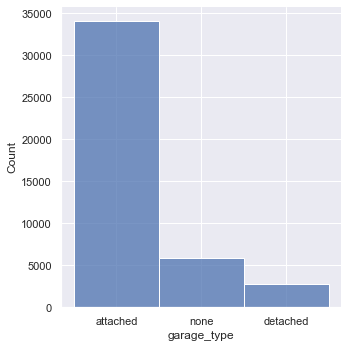

In [25]:
sns.displot(data=df, x="garage_type");

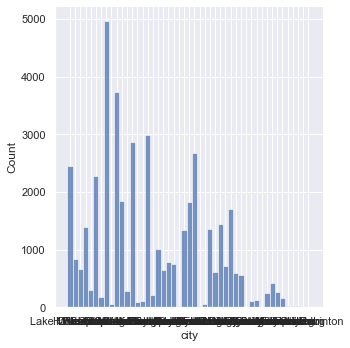

In [26]:
sns.displot(data=df, x="city");

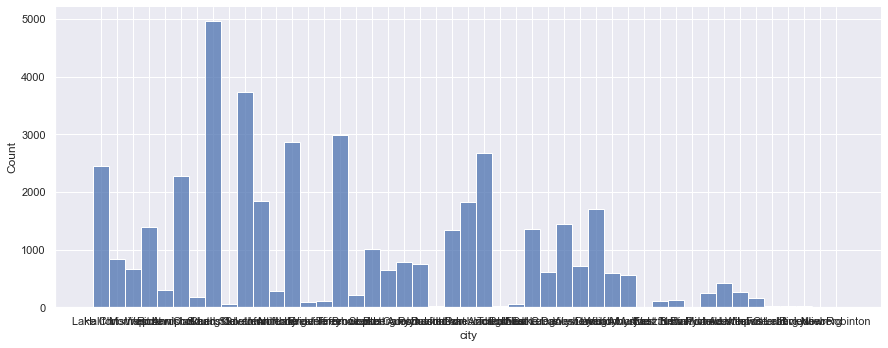

In [27]:
sns.displot(data=df, x="city",aspect=5/2);

In [28]:
df['city'].unique()

array(['Hallfort', 'Lake Christinaport', 'Morrisport', 'West Ann',
       'Richardport', 'Lewishaven', 'Clarkberg', 'Chadstad',
       'South Stevenfurt', 'Coletown', 'South Anthony', 'Jenniferberg',
       'North Erinville', 'Lake Jennifer', 'West Terrence',
       'Jeffreyhaven', 'Brownport', 'Scottberg', 'Lake Carolyn',
       'East Amychester', 'Joshuafurt', 'Davidtown',
       'Port Jonathanborough', 'Lake Jack', 'Port Andrealand',
       'Toddshire', 'Port Daniel', 'East Lucas', 'West Gregoryview',
       'Lake Dariusborough', 'West Lydia', 'Davidfort', 'Wendybury',
       'Amystad', 'Martinezfort', 'East Justin', 'West Brittanyview',
       'New Michele', 'East Janiceville', 'Port Adamtown', 'Justinport',
       'West Gerald', 'Fosterberg', 'Leahview', 'Rickytown', 'Julieberg',
       'New Robinton'], dtype=object)

In [29]:
len(df['city'].unique())

47

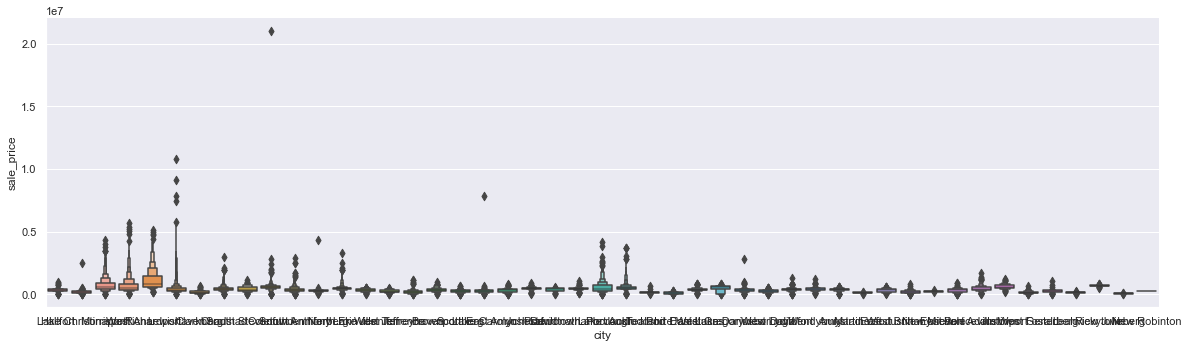

In [30]:
sns.catplot(x="city", y="sale_price", data=df,aspect=10/3,kind='boxen')

In [10]:
# Replace categorical data with one-hot encoded data
features_df = pd.get_dummies(df, columns=['garage_type', 'city'])
features_df.columns

Index(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_sqft',
       'carport_sqft', 'has_fireplace', 'has_pool', 'has_central_heating',
       'has_central_cooling', 'sale_price', 'garage_type_attached',
       'garage_type_detached', 'garage_type_none', 'city_Amystad',
       'city_Brownport', 'city_Chadstad', 'city_Clarkberg', 'city_Coletown',
       'city_Davidfort', 'city_Davidtown', 'city_East Amychester',
       'city_East Janiceville', 'city_East Justin', 'city_East Lucas',
       'city_Fosterberg', 'city_Hallfort', 'city_Jeffreyhaven',
       'city_Jenniferberg', 'city_Joshuafurt', 'city_Julieberg',
       'city_Justinport', 'city_Lake Carolyn', 'city_Lake Christinaport',
       'city_Lake Dariusborough', 'city_Lake Jack', 'city_Lake Jennifer',
       'city_Leahview', 'city_Lewishaven', 'city_Martinezfort',
       'city_Morrisport', 'city_New Michele', 'city_New Robinton',
       'city_North Erinville', 

In [ ]:
# Remove the sale price from the feature data
del features_df['sale_price']

# Create the X and y arrays
X = features_df.values
y = df['sale_price'].values

In [32]:
X,y

(array([[1978, 1, 4, ..., 0, 0, 0],
        [1958, 1, 3, ..., 0, 0, 0],
        [2002, 1, 3, ..., 0, 0, 0],
        ...,
        [1983, 1, 1, ..., 0, 0, 0],
        [1981, 1, 3, ..., 0, 0, 0],
        [1980, 1, 3, ..., 0, 0, 0]], dtype=object),
 array([ 270897.,  302404., 2519996., ...,   98280.,   98278.,  186480.]))

In [12]:
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train, X_test, y_train, y_test 

(array([[1987, 1, 3, ..., 0, 0, 0],
        [1985, 1, 3, ..., 0, 0, 0],
        [1990, 1, 4, ..., 0, 0, 0],
        ...,
        [1989, 2, 3, ..., 0, 0, 0],
        [1998, 1, 4, ..., 0, 0, 0],
        [2002, 1, 4, ..., 0, 0, 0]], dtype=object),
 array([[2003, 1, 4, ..., 0, 0, 0],
        [2014, 2, 3, ..., 0, 0, 0],
        [2005, 1, 3, ..., 0, 0, 0],
        ...,
        [1984, 1, 2, ..., 0, 0, 0],
        [2015, 2, 5, ..., 0, 0, 0],
        [2006, 2, 3, ..., 1, 0, 0]], dtype=object),
 array([281611.,  36540., 587162., ..., 277197., 472501., 135449.]),
 array([667802., 434066., 274682., ..., 207900., 635670., 441001.]))

In [33]:
# Fit regression model
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [36]:
# Find the error rate on the training set
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)

# Find the error rate on the test set
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mae)


Training Set Mean Absolute Error: 48201.7847
Test Set Mean Absolute Error: 58654.6911


In [35]:
# Fit regression model by fine-tuning hyper-parameters
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber',
    random_state=0
)
model.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.1,
                          min_samples_leaf=9, n_estimators=1000,
                          random_state=0)

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [37]:
import numpy as np

# These are the feature labels from our data set
feature_labels = features_df.columns

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))


city_New Robinton - 0.00%
city_New Michele - 0.00%
city_Martinezfort - 0.00%
city_Julieberg - 0.00%
city_Davidtown - 0.00%
city_Rickytown - 0.00%
city_Lake Jennifer - 0.01%
city_West Brittanyview - 0.01%
city_West Terrence - 0.01%
city_South Stevenfurt - 0.01%
city_East Justin - 0.01%
city_Fosterberg - 0.01%
city_Leahview - 0.02%
city_Port Adamtown - 0.03%
city_Toddshire - 0.04%
city_Amystad - 0.04%
city_Joshuafurt - 0.04%
city_East Janiceville - 0.04%
city_Brownport - 0.05%
city_Port Daniel - 0.05%
city_Wendybury - 0.05%
city_Clarkberg - 0.10%
city_West Lydia - 0.10%
city_Port Jonathanborough - 0.12%
garage_type_detached - 0.12%
city_Davidfort - 0.12%
has_central_heating - 0.19%
city_Jenniferberg - 0.21%
city_Lewishaven - 0.22%
city_East Amychester - 0.22%
city_West Gerald - 0.23%
city_North Erinville - 0.25%
city_East Lucas - 0.27%
city_Richardport - 0.31%
city_Lake Carolyn - 0.32%
city_Morrisport - 0.32%
city_Lake Dariusborough - 0.35%
city_South Anthony - 0.35%
city_West Gregoryvie

In [38]:
from sklearn.model_selection import GridSearchCV

# Create the model
model = ensemble.GradientBoostingRegressor()

# Parameters we want to try
param_grid = {
    'min_samples_leaf': [3, 9],
    'learning_rate': [0.1, 0.05],
}

#param_grid = {
#    'n_estimators': [500, 3000],
#    'max_depth': [4, 6],
#    'min_samples_leaf': [3, 9],
#    'learning_rate': [0.1, 0.05],
#    'max_features': [0.3, 0.1],
#    'loss': ['ls', 'huber']
#}

# Define the grid search we want to run. -1 uses all processors
gs_cv = GridSearchCV(model, param_grid, n_jobs=-1)

# Run the grid search - on only the training data!
gs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

# After running a .....long..... time, the output will be something like
# {'loss': 'huber', 'learning_rate': 0.1, 'min_samples_leaf': 9, 'n_estimators': 3000, 'max_features': 0.1, 'max_depth': 6}

# That is the combination that worked best.

# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, gs_cv.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, gs_cv.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

{'learning_rate': 0.1, 'min_samples_leaf': 9}
Training Set Mean Absolute Error: 71745.1264
Test Set Mean Absolute Error: 73808.2307


Other Datasets
Auto MPG : https://archive.ics.uci.edu/ml/datasets/auto+mpg
    
Auto MPG CSV format : https://www.kaggle.com/uciml/autompg-dataset    
        
Bike Sharing : https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
        
CSV Format: https://www.kaggle.com/marklvl/bike-sharing-dataset